***LUCAS MERCIER - ING3 - ESIEE-IT - 2025***

# Classification of handwritten numbers (MNIST) with a multilayer perceptron neural network (MLP)

# PHASE 1 : Fruit classification with a decision tree

In [ ]:
'''
# Code Python très simple pour classifier des fruits
#
# Objectifs de l'Étape 1 :
1- Exécution de Code : Se familiariser avec l'exécution d'un script Python simple.
2- Observation des Résultats : Comprendre que le code prend des entrées (caractéristiques des fruits) et produit des sorties (prédictions de fruits).
3- Introduction à un Modèle ML : Voir un exemple concret de l'utilisation d'un modèle d'apprentissage automatique (ici, un arbre de décision) pour faire des prédictions.
4- Concept d'Entraînement : Comprendre que le modèle a besoin d'être "entraîné" avec des données existantes avant de pouvoir faire des prédictions sur de nouvelles données.
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Instructions :
#
# 1- Exécutez le code.
# 2- Observez les résultats. Qu'est-ce que le programme affiche ?
# 3- Expérimentez (facultatif, mais encouragé) :
#    - Modifiez les caractéristiques des nouveaux_fruits. Quelles sont les nouvelles prédictions ?
#    - Ajoutez d'autres exemples de fruits dans les attributs et etiquettes. Exécutez à nouveau le code. Est-ce que les prédictions changent ?
'''


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Nos données de fruits (simplifiées)
# Chaque sous-liste représente un fruit avec ses caractéristiques : [couleur, forme]
attributs = [
    ["Rouge", "Ronde"],
    ["Jaune", "Allongée"],
    ["Orange", "Ronde"],
    ["Vert", "Ronde"],
    ["Jaune", "Ronde"],
    ["Bleu", "Ronde"],
    ["Marron", "Allongée"]
]
etiquettes = ["Pomme", "Banane", "Orange", "Pomme", "Banane", "Myrtille", "Date"]

# Créer un OneHotEncoder pour convertir les caractéristiques catégorielles en numériques
encoder = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])], # Appliquer OneHotEncoder aux colonnes 0 et 1 (couleur et forme)
    remainder='passthrough'  # Laisser les autres colonnes inchangées (s'il y en avait)
)

# Encoder les attributs
attributs_encoded = encoder.fit_transform(attributs)

# Créer un modèle d'arbre de décision (un modèle simple de classification)
modele = DecisionTreeClassifier()

# Apprendre au modèle à partir des données (l'entraîner)
modele.fit(attributs_encoded, etiquettes)

# Faire des prédictions pour de nouveaux fruits
nouveaux_fruits = [
    ["Rouge", "Ronde"],
    ["Jaune", "Allongée"],
    ["Vert", "Ronde"],
    ["Orange", "Ronde"],
    ["Vert", "Allongée"],
    ["Orange", "Allongée"],
    ["Bleu", "Ronde"],
    ["Marron", "Allongée"]
]

# Encoder les nouveaux fruits avant de faire des prédictions
nouveaux_fruits_encoded = encoder.transform(nouveaux_fruits)

predictions = modele.predict(nouveaux_fruits_encoded)

# Afficher les prédictions
print("Prédictions pour les nouveaux fruits :")
for i in range(len(nouveaux_fruits)):
    print(f"Un fruit {nouveaux_fruits[i][0]} et {nouveaux_fruits[i][1]} est prédit comme étant un(e) : {predictions[i]}")





Prédictions pour les nouveaux fruits :
Un fruit Rouge et Ronde est prédit comme étant un(e) : Pomme
Un fruit Jaune et Allongée est prédit comme étant un(e) : Banane
Un fruit Vert et Ronde est prédit comme étant un(e) : Pomme
Un fruit Orange et Ronde est prédit comme étant un(e) : Orange
Un fruit Vert et Allongée est prédit comme étant un(e) : Date
Un fruit Orange et Allongée est prédit comme étant un(e) : Date
Un fruit Bleu et Ronde est prédit comme étant un(e) : Myrtille
Un fruit Marron et Allongée est prédit comme étant un(e) : Date


# PHASE 2 : Building a MLP model on MNIST - preliminary steps

In [ ]:
# -*- coding: utf-8 -*-
# Author : Badr TAJINI
#
'''
# Code Python très simple pour construire un modèle MLP basique
#
# Objectifs de l'Étape 2 :
#
# 1- Chargement de Données : Introduire l'idée de charger un dataset standard (MNIST) en utilisant scikit-learn.
# 2- Forme des Données : Comprendre la structure des données d'images (nombre d'échantillons, nombre de caractéristiques).
# 3- Construction d'un Modèle : Apprendre à instancier un modèle MLP de base en utilisant MLPClassifier de scikit-learn.=
# 4- Hyperparamètres : Être initié au concept des hyperparamètres d'un modèle (comme le nombre de couches cachées et le nombre de neurones par couche) et comment les modifier lors de la construction du modèle.
#
# Note : Pas d'Entraînement (pour l'instant) : Se concentrer sur la construction du modèle, la prochaine étape se concentrera sur l'entraînement.
#
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Instructions :
#
# 1- Exécutez le code.
# 2- Observez les sorties de print :
#    - Que montrent les formes des données X et y ? (Nombre d'images, nombre de pixels par image, nombre d'étiquettes)
#    - Que se passe-t-il lorsque vous créez différentes instances de MLPClassifier ? Quels sont les paramètres que vous pouvez modifier ? (Par exemple, hidden_layer_sizes, solver)
#
# 3- Expérimentez :
#    - Modifiez les valeurs de hidden_layer_sizes. Que se passe-t-il si vous mettez une seule valeur ? Deux valeurs ?
#    - Essayez de changer le solver par 'sgd'.
#
# References :
# - Visualisation d'un MLPClassifier : https://scikit-learn.org/1.5/auto_examples/neural_networks/plot_mnist_filters.html
'''


from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np

# 1. Charger le dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# 2. Examiner les données (pour comprendre leur forme)
print("Forme des données d'images (X) :", X.shape)
print("Forme des étiquettes (y) :", y.shape)

# 3. Préparer les données (une étape simple : mise à l'échelle - peut être simplifiée au début)
#    Note : Pour simplifier au maximum, on pourrait même sauter cette étape au début.
X = X / 255.0

# 4. Construire un modèle MLP basique
#    Ici, nous allons juste instancier le modèle avec différents paramètres.

# Exemple 1 : Un MLP très simple avec une seule couche cachée de 50 neurones
mlp_simple = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10)
print("Modèle MLP simple créé :", mlp_simple)

# Exemple 2 : Un MLP avec deux couches cachées
mlp_deux_couches = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10)
print("Modèle MLP à deux couches créé :", mlp_deux_couches)

# Exemple 3 : Essayer différents algorithmes d'optimisation
mlp_adam = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', max_iter=10)
print("MLP avec optimiseur Adam :", mlp_adam)

mlp_sgd = MLPClassifier(hidden_layer_sizes=(50,), solver='sgd', learning_rate_init=0.01, max_iter=10)
print("MLP avec optimiseur SGD :", mlp_sgd)

# Remarque : `max_iter` est limité ici pour éviter que l'entraînement ne prenne trop de temps si on l'exécute.
# L'objectif principal est l'instanciation du modèle.

Forme des données d'images (X) : (70000, 784)
Forme des étiquettes (y) : (70000,)
Modèle MLP simple créé : MLPClassifier(hidden_layer_sizes=(50,), max_iter=10)
Modèle MLP à deux couches créé : MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10)
MLP avec optimiseur SGD : MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=10,
              solver='sgd')


# PHASE 3 : Training and evaluation of a MLP model on MNIST

In [ ]:
# -*- coding: utf-8 -*-
# Author : Badr TAJINI
#
'''
# Code Python très simple pour construire un modèle MLP basique avec un entrainement et une évaluation
#
# Objectifs de l'Étape 3 :
#
# 1- Division des Données : Comprendre l'importance de diviser les données en ensembles d'entraînement et de test pour une évaluation réaliste du modèle.
# 2- Entraînement d'un Modèle : Voir concrètement comment un modèle MLP est entraîné en utilisant la méthode fit().
# 3- Prédiction : Apprendre à utiliser la méthode predict() pour faire des prédictions sur de nouvelles données.
# 4- Évaluation de la Précision : Comprendre ce que représente la précision et comment elle est calculée en utilisant accuracy_score.
# 5- Impact des Hyperparamètres : Commencer à explorer l'impact de certains hyperparamètres (comme le nombre d'itérations et l'architecture du réseau) sur les performances du modèle.
# 6- Le Processus de l'Apprentissage Automatique : Avoir une vue d'ensemble du processus : chargement des données, préparation, construction du modèle, entraînement, prédiction et évaluation.
#
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Instructions :
#
# 1- Exécutez le code.
# 2- Observez les sorties :
#    - Combien de temps prend l'entraînement ?
#    - Quelle est la précision du modèle sur l'ensemble de test ? Comprenez-vous ce que représente ce pourcentage ?
#    - Regardez les exemples de prédictions et les étiquettes réelles. Le modèle a-t-il fait des erreurs sur ces exemples ?
# 3- Expérimentez :
#    - Modifiez le nombre d'itérations (max_iter) : Augmentez max_iter à 20 ou 50. Relancez le code. La précision s'améliore-t-elle ? L'entraînement prend-il plus de temps ?
#    - Modifiez l'architecture du modèle (hidden_layer_sizes) : Essayez hidden_layer_sizes=(100,) ou hidden_layer_sizes=(100, 50). Comment cela affecte-t-il la précision et le temps d'entraînement ?
#    - Examinez la division des données : Modifiez test_size dans train_test_split. Quel est l'impact sur la quantité de données utilisées pour l'entraînement et le test ?
'''

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Charger le dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32) / 255.0  # Normaliser les données
y = mnist.target.astype(int)

# 2. Diviser les données en ensembles d'entraînement et de test
#    C'est crucial pour évaluer les performances du modèle sur des données qu'il n'a jamais vues.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# 3. Construire un modèle MLP (vous pouvez utiliser un des modèles de l'étape 2 ou en créer un nouveau)
#    Commençons par un modèle simple pour l'entraînement initial.
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)
print("Modèle MLP créé :", mlp)

# 4. Entraîner le modèle sur les données d'entraînement
#    C'est là que le modèle apprend à reconnaître les chiffres.
print("\nDébut de l'entraînement du modèle...")
mlp.fit(X_train, y_train)
print("Entraînement terminé.")

# 5. Faire des prédictions sur l'ensemble de test
#    Utiliser le modèle entraîné pour prédire les chiffres sur l'ensemble de test.
y_pred = mlp.predict(X_test)

# 6. Évaluer les performances du modèle en calculant la précision
#    La précision mesure le pourcentage de chiffres correctement classifiés.
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision du modèle sur l'ensemble de test : {accuracy * 100:.2f}%")

# 7. (Facultatif) Afficher quelques prédictions et les étiquettes réelles pour comparaison
print("\nQuelques prédictions et étiquettes réelles :")
for i in range(100):
    print(f"Image {i+1}: Prediction = {y_pred[i]}, Real = {y_test.iloc[i]}")

Modèle MLP créé : MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)

Début de l'entraînement du modèle...
Entraînement terminé.

Précision du modèle sur l'ensemble de test : 96.29%

Quelques prédictions et étiquettes réelles :
Image 1: Prediction = 6, Real = 6
Image 2: Prediction = 3, Real = 3
Image 3: Prediction = 2, Real = 2
Image 4: Prediction = 0, Real = 0
Image 5: Prediction = 7, Real = 7
Image 6: Prediction = 5, Real = 5
Image 7: Prediction = 6, Real = 6
Image 8: Prediction = 9, Real = 3
Image 9: Prediction = 8, Real = 8
Image 10: Prediction = 3, Real = 3
Image 11: Prediction = 7, Real = 7
Image 12: Prediction = 9, Real = 9
Image 13: Prediction = 3, Real = 3
Image 14: Prediction = 1, Real = 2
Image 15: Prediction = 4, Real = 4
Image 16: Prediction = 4, Real = 4
Image 17: Prediction = 4, Real = 7
Image 18: Prediction = 0, Real = 0
Image 19: Prediction = 0, Real = 0
Image 20: Prediction = 9, Real = 9
Image 21: Prediction = 2, Real = 2
Image 22: Prediction = 7, R

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


# PHASE 4 : Improving the MLP model's precision

In [ ]:
# -*- coding: utf-8 -*-
# Author : Badr TAJINI
#
'''
# Code Python très simple pour construire un modèle MLP basique avec l'amélioration de la précision
#
# Objectifs de l'Étape 4 :
#
# 1- Impact de l'Architecture : Comprendre comment la complexité du réseau neuronal (nombre de couches et de neurones) influence sa capacité à apprendre et sa précision.
# 2- Régularisation : Introduire le concept de régularisation comme moyen de prévenir le sur-apprentissage et d'améliorer la généralisation du modèle.
# 3- Algorithmes d'Optimisation : Explorer différents algorithmes d'optimisation et comprendre que le choix de l'optimiseur et de ses paramètres (comme le taux d'apprentissage) peut avoir un impact significatif sur l'entraînement et les performances du modèle.
# 4- Hyperparamètres et Ajustement : Renforcer l'idée que la construction d'un bon modèle implique de choisir et d'ajuster les bons hyperparamètres.
# 5- Évaluation Comparative : Apprendre à comparer les performances de différents modèles et configurations.
#
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Instructions :
#
# 1- Exécutez le code.
# 2- Observez les sorties :
#    - Comment la précision change-t-elle lorsque vous modifiez l'architecture du modèle (plus de neurones, plus de couches) ?
#    - Quel est l'impact de l'ajout de la régularisation L2 ? Comprenez-vous l'idée de pénaliser les poids importants pour éviter le sur-apprentissage ?
#    - Comment les différents algorithmes d'optimisation (adam vs sgd) affectent-ils la précision ?
# 3- Expérimentez :
#    - Architecture : Essayez différentes configurations pour hidden_layer_sizes. Par exemple, (50, 50), (150,), (128, 64, 32). Y a-t-il une limite au nombre de couches ou de neurones que vous pouvez ajouter ?
#    - Régularisation : Modifiez la valeur du paramètre alpha. Qu'arrive-t-il à la précision si vous augmentez ou diminuez alpha ?
#    - Optimisation :
#      - Pour l'optimiseur sgd, essayez différents taux d'apprentissage (learning_rate_init). Un taux plus élevé permet-il d'apprendre plus vite ? Est-ce toujours bénéfique ?
#      - Recherchez d'autres optimiseurs disponibles dans MLPClassifier (par exemple, lbfgs, bien que moins adapté aux grands datasets) et testez-les.
#    - Nombre d'itérations : Si vos expériences sont rapides, essayez d'augmenter max_iter pour voir si le modèle continue de s'améliorer. Soyez patients, l'entraînement peut prendre plus de temps.
'''

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Charger et préparer le dataset MNIST (comme à l'étape 3)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Explorer différentes architectures de modèles MLP
print("\n--- Exploration of different architectures ---")

# Modèle 1 : Plus de neurones dans une seule couche cachée
mlp_large = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42)
mlp_large.fit(X_train, y_train)
y_pred_large = mlp_large.predict(X_test)
accuracy_large = accuracy_score(y_test, y_pred_large)
print(f"Accuracy with an hidden layer of 100 neurons  : {accuracy_large * 100:.2f}%")

# Modèle 2 : Plusieurs couches cachées
  #mlp_multi = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=20, random_state=42)
  #mlp_multi.fit(X_train, y_train)
  #y_pred_multi = mlp_multi.predict(X_test)
  #accuracy_multi = accuracy_score(y_test, y_pred_multi)
  #print(f"Accuracy with an 2 hidden layers ((128, 64, 32 neurons) : {accuracy_multi * 100:.2f}%")

# 3. Introduction à la régularisation (L2) pour éviter le sur-apprentissage
print("\n--- Introduction to regularization ---")

# Modèle 3 : Avec régularisation L2 (paramètre alpha)
  #mlp_regularized = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=10, alpha=10, random_state=42)
  #mlp_regularized.fit(X_train, y_train)
  #y_pred_regularized = mlp_regularized.predict(X_test)
  #accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
  #print(f"Accuracy with L2 regularization (alpha=10) : {accuracy_regularized * 100:.2f}%")

# 4. Explorer différents algorithmes d'optimisation
print("\n--- Exploration of different optimization algorithms ---")

# Modèle 4 : Utilisation de l'optimiseur 'adam' (qui est l'optimiseur par défaut)
  #mlp_adam = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, solver='adam', random_state=42)
  #mlp_adam.fit(X_train, y_train)
  #y_pred_adam = mlp_adam.predict(X_test)
  #accuracy_adam = accuracy_score(y_test, y_pred_adam)
  #print(f"Accuracy with Adam : {accuracy_adam * 100:.2f}%")

# Modèle 5 : Utilisation de l'optimiseur 'sgd' (Stochastic Gradient Descent) avec un taux d'apprentissage
mlp_sgd = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=10, solver='sgd', learning_rate_init=1, random_state=42)
mlp_sgd.fit(X_train, y_train)
y_pred_sgd = mlp_sgd.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"Accuracy wit SGD (learning_rate=1) : {accuracy_sgd * 100:.2f}%")


#LBFGS
mlp_lbfgs = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=400, solver='lbfgs', random_state=42)
mlp_lbfgs.fit(X_train, y_train)
accuracy_lbfgs = accuracy_score(y_test, mlp_lbfgs.predict(X_test))
print(f"Précision avec LBFGS : {accuracy_lbfgs * 100:.2f}%")

# Remarque : `max_iter` est toujours limité ici pour des raisons de temps d'exécution lors des tests.
# Pour obtenir de meilleures performances, il faudrait augmenter le nombre d'itérations.


--- Exploration of different architectures ---


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy with an hidden layer of 100 neurons  : 97.04%

--- Introduction to regularization ---

--- Exploration of different optimization algorithms ---


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy wit SGD (learning_rate=1) : 9.59%
Précision avec LBFGS : 97.36%


# Phase 5: Model Prediction Visualization

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Probabilités prédites pour la première image de test :
 [7.74772482e-05 1.15869550e-07 5.20994981e-03 3.64146628e-03
 4.97844444e-07 1.15955470e-01 9.61162303e-05 1.91010449e-06
 8.74976844e-01 4.01526218e-05]

Classes prédites (les 20 premières) : [8 9 5 7 7 0 6 2 7 9 8 9 7 8 2 5 9 1 7 8]
Classes réelles     (les 20 premières) : [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


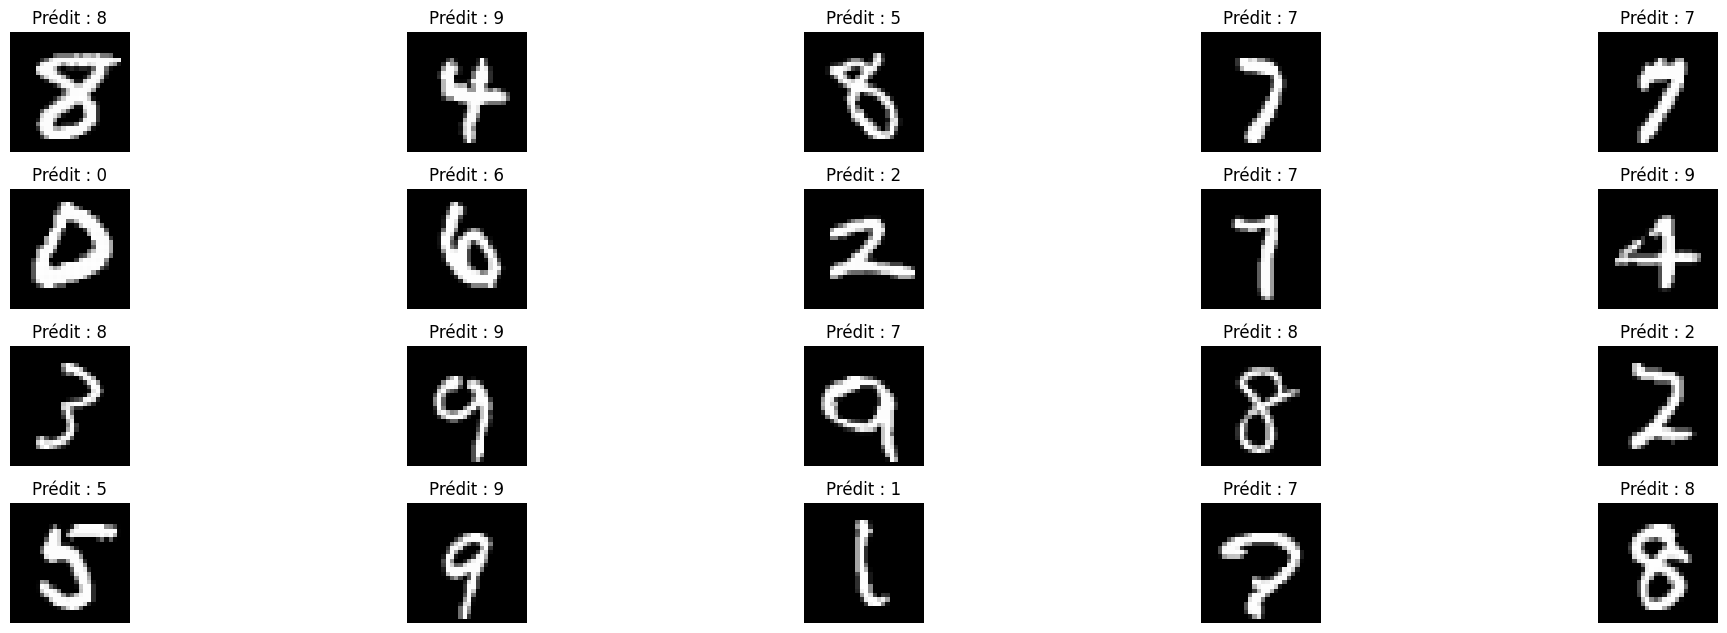

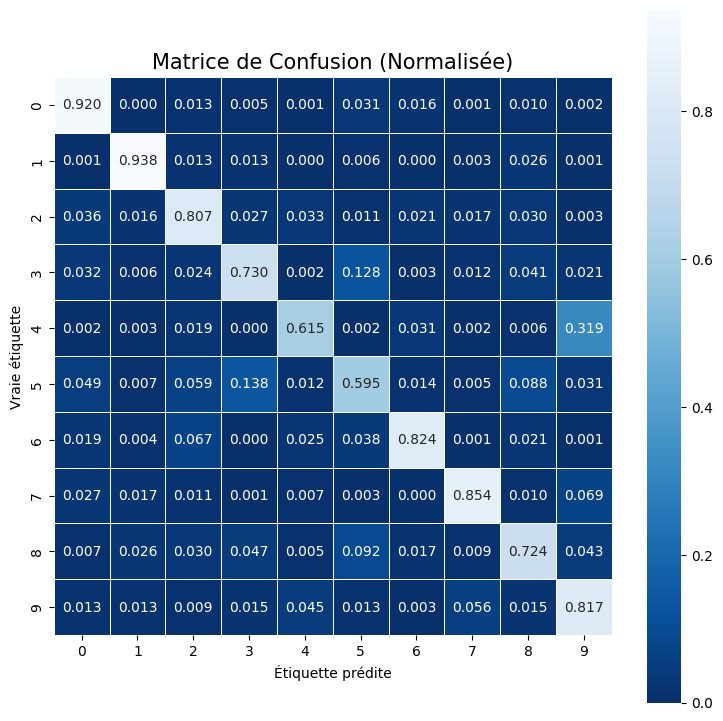


Précision du modèle sur l'ensemble de test : 78.76%


In [ ]:
# -*- coding: utf-8 -*-
# Author : Badr TAJINI
#
'''
# Code Python très simple pour construire un modèle MLP basique avec la visualisation de la prédiction
#
# Objectifs de l'Étape 5 :
#
# 1- Visualisation des Prédictions : Obtenir une compréhension visuelle des performances du modèle en examinant directement les images et leurs prédictions.
# 2- Matrice de Confusion : Apprendre à interpréter une matrice de confusion pour analyser en détail les types d'erreurs que le modèle commet pour chaque classe.
# 3- Évaluation Qualitative : Comprendre que l'évaluation des modèles ne se limite pas aux métriques numériques comme la précision, mais peut également inclure une analyse qualitative des résultats.
# 4- Corrélation entre Métriques et Visualisations : Faire le lien entre la précision globale du modèle et les informations visuelles fournies par les prédictions et la matrice de confusion. Un modèle avec une précision plus élevée devrait avoir moins d'erreurs visibles et une matrice de confusion avec une diagonale plus forte.
#
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Instructions :
#
# 1- Exécutez le code  (Assurez-vous que les librairies matplotlib et seaborn sont installées).
# 2- Observez les visualisations :
#    - Prédictions sur les images : Regardez les 10 premières images de test. Le modèle a-t-il correctement prédit le chiffre ? Y a-t-il des cas où la prédiction est incorrecte ? Essayez de deviner pourquoi le modèle a pu se tromper dans ces cas (par exemple, un chiffre mal écrit).
#    - Matrice de Confusion : Analysez la matrice de confusion.
#      - Que représente chaque ligne et chaque colonne ?
#      - Les valeurs élevées se trouvent-elles principalement sur la diagonale ? Qu'est-ce que cela signifie ?
#      - Y a-t-il des zones où les valeurs sont plus élevées en dehors de la diagonale ? Quels types d'erreurs le modèle fait-il le plus souvent (par exemple, confond-il souvent le 4 et le 9) ?
# 3- Expérimentez :
#    - Modifiez le modèle : Réutilisez les modèles que vous avez entraînés à l'étape 4 (avec différentes architectures, régularisation, etc.). Comment les visualisations changent-elles en fonction des performances du modèle ? Un modèle plus précis a-t-il une matrice de confusion avec une diagonale plus "prononcée" ?
#    - Affichez plus d'images : Modifiez la boucle pour afficher plus de 10 images. Voyez-vous plus d'erreurs ?
#    - Examinez les erreurs spécifiques : Essayez d'identifier des images où le modèle s'est trompé (en comparant y_test_pred et y_test) et affichez ces images pour essayer de comprendre la source de l'erreur.
'''

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 1. Charger et préparer le dataset MNIST (comme dans les étapes précédentes)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. (Rappel) Créer et entraîner le modèle (vous pouvez réutiliser le meilleur modèle trouvé à l'étape 4)
#    Ici, on utilise un modèle simple pour l'exemple. N'hésitez pas à encourager les étudiants
#    à utiliser les modèles qu'ils ont entraînés précédemment.
  # model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42)
  # model.fit(X_train, y_train)

#LBFGS (best)
#model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=400, solver='lbfgs', random_state=42)
#model.fit(X_train, y_train)
#accuracy_lbfgs = accuracy_score(y_test, mlp_lbfgs.predict(X_test))
#print(f"Précision avec LBFGS : {accuracy_lbfgs * 100:.2f}%")

#AVERAGE
model = MLPClassifier(hidden_layer_sizes=(20,), max_iter=10, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

#SGD (worst)
#model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=40, solver='sgd', learning_rate_init=1, random_state=42)
#model.fit(X_train, y_train)

# 3. Obtenir les probabilités prédites pour l'ensemble de test
#    Pour chaque image de test, le modèle donne une probabilité d'appartenance à chaque classe (chiffre de 0 à 9).
y_test_probs = model.predict_proba(X_test)
print("Probabilités prédites pour la première image de test :\n", y_test_probs[0])

# 4. Convertir les probabilités en prédictions de classe
#    On choisit la classe avec la probabilité la plus élevée comme prédiction.
y_test_pred = np.argmax(y_test_probs, axis=1)
print("\nClasses prédites (les 20 premières) :", y_test_pred[:20])
print("Classes réelles     (les 20 premières) :", y_test[:20].values[:20]) # Accès aux valeurs NumPy

# 5. Visualiser les prédictions sur les 10 premières images de test
plt.figure(figsize=(20, 8))
for index in range(20):
    plt.subplot(5, 5, index + 1)
    # Remodeler l'image aplatie en une image 28x28 pour l'affichage
    plt.imshow(X_test.iloc[index].values.reshape(28, 28), cmap=plt.cm.gray) # Accès aux valeurs NumPy
    plt.title(f"Prédit : {y_test_pred[index]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# 6. Matrice de Confusion
#    Affiche le nombre de fois où chaque chiffre a été confondu avec un autre.
#    La normalisation permet de voir les proportions.
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.title('Matrice de Confusion (Normalisée)', size=15)
plt.show()

# 7. Afficher la précision globale (pour comparer avec les visualisations)
accuracy = np.mean(y_test_pred == y_test)
print(f"\nPrécision du modèle sur l'ensemble de test : {accuracy * 100:.2f}%")